<a href="https://colab.research.google.com/github/Nayeon0525/study_keras/blob/master/convnet_cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 컨브넷 훈련하기 (cats vs dogs)

## 1. 데이터셋 다운로드

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kimnayeonkorea","key":"15075c9fdc25a268a1384493d815d427"}'}

In [3]:
ls -lha kaggle.json

-rw-r--r-- 1 root root 70 Oct  7 17:58 kaggle.json


In [4]:
!mkdir -p ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle

In [6]:
!chmod 600 /root/.kaggle/kaggle.json

In [7]:

!kaggle datasets download -d tongpython/cat-and-dog

 89% 195M/218M [00:03<00:00, 26.9MB/s]
100% 218M/218M [00:03<00:00, 58.2MB/s]


In [8]:
!unzip cat-and-dog.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  inflating: training_set/training_set/cats/cat.3719.jpg  
  inflating: training

In [9]:
import os, shutil

In [10]:
original_dataset_dir = './training_set/training_set'

In [11]:
base_dir = './datasets'
os.mkdir(base_dir)

## 2. 데이터셋 분배하기 (train, test, validation)


In [12]:
# make train dir
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

# make validation dir
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

# make test dir
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)


In [13]:
# cat - train
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
# cat - validation
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
# cat - test
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)



# dog - train
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
# dog - validation
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
# dog - test
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)



In [14]:
# cat - train (1000)
fnames = ['cat.{}.jpg'.format(i) for i in range(1, 1001)]

for fname in fnames:
  src = os.path.join(original_dataset_dir+'/cats', fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

# cat - validation
fnames = ['cat.{}.jpg'.format(i) for i in range(1001, 1501)]

for fname in fnames:
  src = os.path.join(original_dataset_dir+'/cats', fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

# cat - test
fnames = ['cat.{}.jpg'.format(i) for i in range(1501, 2001)]

for fname in fnames:
  src = os.path.join(original_dataset_dir+'/cats', fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

In [15]:
# dog - train (1000)
fnames = ['dog.{}.jpg'.format(i) for i in range(1, 1001)]

for fname in fnames:
  src = os.path.join(original_dataset_dir+'/dogs', fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

# dog - validation
fnames = ['dog.{}.jpg'.format(i) for i in range(1001, 1501)]

for fname in fnames:
  src = os.path.join(original_dataset_dir+'/dogs', fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

# dog - test
fnames = ['dog.{}.jpg'.format(i) for i in range(1501, 2001)]

for fname in fnames:
  src = os.path.join(original_dataset_dir+'/dogs', fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

## 3. 데이터 전처리

In [19]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [21]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='binary'
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## 4. 네트워크 구성하기

In [16]:
from keras import layers
from keras import models

In [17]:
model = models.Sequential()


In [18]:
import cv2
import numpy as np

In [22]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [27]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

## 5. 훈련

In [28]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 9s 90ms/step - loss: 0.7225 - acc: 0.5185 - val_loss: 0.6906 - val_acc: 0.5280
Epoch 2/30
100/100 [==============================] - 9s 88ms/step - loss: 0.6933 - acc: 0.5700 - val_loss: 0.6849 - val_acc: 0.5500
Epoch 3/30
100/100 [==============================] - 9s 88ms/step - loss: 0.6525 - acc: 0.6430 - val_loss: 0.6472 - val_acc: 0.6050
Epoch 4/30
100/100 [==============================] - 9s 87ms/step - loss: 0.6221 - acc: 0.6810 - val_loss: 0.5965 - val_acc: 0.6690
Epoch 5/30
100/100 [==============================] - 9s 86ms/step - loss: 0.5640 - acc: 0.7180 - val_loss: 0.5580 - val_acc: 0.6940
Epoch 6/30
100/100 [==============================] - 9s 85ms/step - loss: 0.5164 - acc: 0.7410 - val_loss: 0.7625 - val_acc: 0.6470
Epoch 7/30
100/100 [==============================] - 8s 85ms/step - loss: 0.4764 - acc: 0.7790 - val_loss: 0.5926 - val_acc: 0.7010
Epoch 8/30
100/100 [==============================] - 8s 85ms/step - 

## 6. 훈련 결과 확인

In [29]:
import matplotlib.pyplot as plt


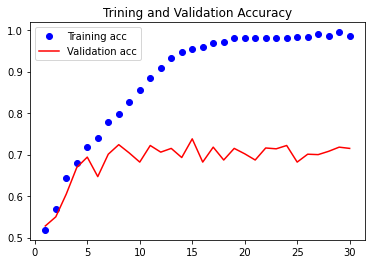

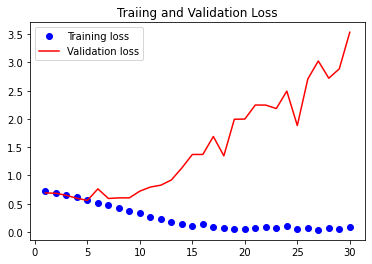

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title("Trining and Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Traiing and Validation Loss')
plt.legend()
plt.show()

In [32]:
test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [35]:
eval = model.evaluate_generator(test_generator)

In [36]:
eval

[4.098359107971191, 0.722000002861023]